## MM Week7 assignment
### Submission due : 23:59, Mar 24th.

***
### Problem 1. The Roll model with stale prices(Exercise 8.1 in EMM, Hasbrouck)
The beliefs of market participants at time $t$ are summarized in $m_t$, where $m_t = m_{t-1} + w_t$, 

$w_t = \lambda q_t + u_t$, 

and $u_t \sim \mathcal{N}(0, \sigma_u^2)$ is a random ($Cov(q_t, u_t) =0 $) shock at time $t$, $q_t = \pm 1$(trade direction) with equal probability.

But due to operational delays, trades actually occur relative to a lagged value: $p_t = m_{t-1} + cq_t$.

What are the autocovariance of $\Delta p_t$ ? 

What is its moving average representation of $\Delta p_t$?

***



**Autocovariance of Delta p_t (gamma_k):**

We start by defining the change in price as $(\Delta p_t = p_t - p_{t-1})$. From the given model, we have:

$$p_t = m_{t-1} + cq_t$$

$$p_{t-1} = m_{t-2} + cq_{t-1}$$

Thus,

$$\Delta p_t = (m_{t-1} + cq_t) - (m_{t-2} + cq_{t-1}) = \lambda q_{t-1} + u_{t-1} + cq_t - cq_{t-1}$$

Since $q_t$ and $u_t$ are independent and each take values of $\pm 1$ with equal probability, and $u_t$ is normally distributed with mean 0 and variance $\sigma_u^2$, we analyze the autocovariance:

- For $k = 0$, the autocovariance $\gamma_0$ is the variance of $\Delta p_t$:

  $$\gamma_0 = Var(\lambda q_{t-1} + u_{t-1} + cq_t - cq_{t-1})$$
  $$= Var(\lambda q_{t-1} - cq_{t-1}) + Var(u_{t-1}) + Var(cq_t)$$
  $$= (\lambda^2 + 2c^2)Var(q_t) + \sigma_u^2$$
  $$= \lambda^2 + 2c^2 + \sigma_u^2$$

- For $k \neq 0$, typically, since $q_t$ and $u_t$ are uncorrelated with their past values:

  $$\gamma_k = 0$$

**Moving Average Representation of Delta p_t:**

The moving average (MA) representation of a time series is an expression of the series as a linear combination of the current and past random shocks. Since $\Delta p_t$ can be expressed in terms of the shock $u_{t-1}$ and the trade directions $q_{t-1}$, $q_t$, a MA representation would be:

$$\Delta p_t = c(q_t - q_{t-1}) + \lambda q_{t-1} + u_{t-1}$$

Here, $\Delta p_t$ is shown as a moving average of the past shock $u_{t-1}$, and the changes in trade directions $q_t$ and $q_{t-1}$, constituting an MA(1) process due to its direct dependency on only the immediate past value.



***


### Problem 2. Parlour Model(1998)      
Following the numerical example of the Parlour(1998) Model considering three trading periods from the last $(T,\ T-1,\ T-2)$, answer the following question. In this exercise, all the settings are unchanged ($v=5.5,B=5,A=6,\beta_t\sim Unif\left(0,2\right),Pr\left(Buy\right)=Pr\left(Sell\right)=0.5$). Let’s use a richer notation.
$$Pr\left(MS;N_t^A,N_t^B,\ t\right),\ Pr\left(LS;N_t^A,N_t^B,\ t\right),\ Pr\left(NT;N_t^A,N_t^B,\ t\right)$$
are the probabilities of Market Sell (MS), Limit Sell (LS), and No trade (NT) at time $t$, given the state of the order book at time t.    

(1)What is the value of the following six probabilities? 
$$Pr\left(MS;1,1,T-2\right),Pr\left(MB;1,1,T-2\right),Pr\left(LS;1,1,T-2\right),Pr\left(LB;1,1,T-2\right).$$
    

(2)What if $N_{T-2}^A=1,N_{T-2}^B=0$, compute the execution probability $p_{T-2}^s,p_{T-2}^b$.


### (1)

In [4]:
import sympy
from sympy import symbols, integrate
v = 5.5
B = 5
A = 6
Pr_Buy = Pr_Sell = 0.5

beta = symbols('beta', real=True)

Pr_MS = integrate(Pr_Sell * (v - (B + beta)) / (A - B), (beta, 0, v - B)) / 2

Pr_MB = integrate(Pr_Buy * ((A - beta) - v) / (A - B), (beta, 0, A - v)) / 2

Pr_LS = integrate(Pr_Sell * (1 - (v - (B + beta)) / (A - B)), (beta, 0, v - B)) / 2 + Pr_Sell / 2
Pr_LB = integrate(Pr_Buy * (1 - ((A - beta) - v) / (A - B)), (beta, 0, A - v)) / 2 + Pr_Buy / 2

(Pr_MS, Pr_MB, Pr_LS, Pr_LB)


(0.0312500000000000, 0.0312500000000000, 0.343750000000000, 0.343750000000000)

### (2)

In [6]:
NA = 1 
NB = 0  

p_T2_s = Pr_LS.subs({beta: 0}) + Pr_MS.subs({beta: 0})

p_T2_b = Pr_LB.subs({beta: 0}) + Pr_MB.subs({beta: 0})

(p_T2_s.evalf(), p_T2_b.evalf())


(0.375000000000000, 0.375000000000000)

### Problem 3. PIN estimation. 
This exercise uses data from the German Stock Exchange (a subset of the data set used in Grammig, Schiereck, and Theissen, 2001). \
The data set gives, for one stock (BVM) traded on the German Stock Exchange, the number of buy orders and sell orders from June 2 to July 31, 1997 (forty-two days). \
As usual, the orders are signed according to the position taken by liquidity demanders (i.e., an order is signed positively when the trade initiator is a buyer and conversely). \
The stock trades on two markets that operate in parallel: a floor market and an electronic trading system. \
The main difference between the two systems is relative anonymity: a floor market is less anonymous as traders on the floor negotiate prices one-on-one. The data are stored in the Excel file Ch5_ex4_data.xls.\
 This file contains four time seried:
1. buy_f: The number of buy orders executed in the floor market on each day $t, t \in \{1,... ,42\}.$
2. sell_f : The number of sell orders executed in the floor market on each day $t, t\in\{1,... ,42\}.$
3. buy_e: The number of buy orders executed in the electronic market on each day $t, t\in\{1,... ,42\}.$
4. sell_e : The number of sell orders executed in the electronic market on each day $t, t\in\{1,... ,42\}.$

a. Consider the tree describing the order arrival process in Figure 1. 

We modify it to account for the possibility that traders can choose to trade in either the floor market or the electronic market. Specifically, we suppose that informed investors trade at rate $\mu_F$ in the floor market and at rate $\mu_E$ in the electronic market, while uninformed investors buy and sell at rates $ɛ_{bj}$ and $ɛ_{sj}$ in market $j \in \{E , F\}$. 

On these assumptions, what is the likelihood that this trade is informed, conditional on a trade taking place in the floor market? \
Conditional on a trade taking place in the electronic market? \
Call these likelihoods $PIN_F$ and $PIN_E$.

b. Using the series of buy and sell orders executed in each system, propose and implement a methodology to estimate $PIN_F$ and $PIN_E$. \
(Note: Estimation by maximum likelihood may not converge if the initial values for the parameters are not well chosen. For this you must calibrate the initial values of the parameters to estimate, so that at least the average number of buy and sell orders per day on each market implied by the Poisson distributions match the actual averages in the data.)

c. Are informed traders more likely to trade in the anonymous market? Is adverse selection greater in the anonymous market?


#### Figure1.
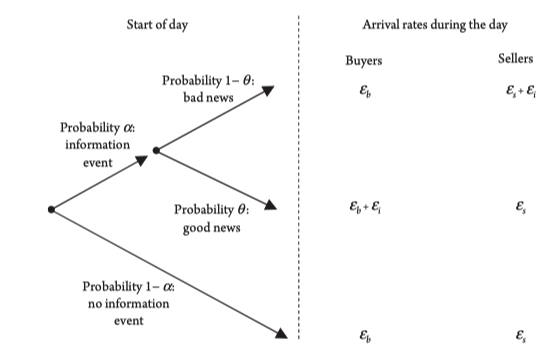

### Hint

In [ ]:
import pandas as pd
import numpy as np
from scipy.special import gammaln

## An example to calculate factorial of the each integers in array.
x = np.array([5, 4, 3])

## gammaln calculate the natural logarithm value of gamma funcation value of given integer
## gammaln(x) = ln(gamma(|x|))= ln((x-1)!) if x is integer
np.exp(gammaln(x + 1))

array([120.,  24.,   6.])

Following Code is an example code of maximum likelihood estimation 
using minimize method in scipy.

This code is retrieved from \
https://stackoverflow.com/questions/29324222/how-can-i-do-a-maximum-likelihood-regression-using-scipy-optimize-minimize

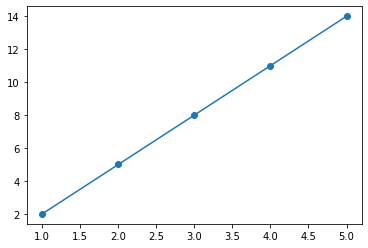

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
def lik(parameters):
    m = parameters[0]
    b = parameters[1]
    sigma = parameters[2]
    for i in np.arange(0, len(x)):
        y_exp = m * x + b
    L = (len(x)/2 * np.log(2 * np.pi) + len(x)/2 * np.log(sigma ** 2) + 1 /
         (2 * sigma ** 2) * sum((y - y_exp) ** 2))
    return L

x = np.array([1,2,3,4,5])
y = np.array([2,5,8,11,14])
lik_model = minimize(lik, np.array([1,1,1]), method='BFGS')
plt.scatter(x,y)
plt.plot(x, lik_model['x'][0] * x + lik_model['x'][1])
plt.show()

You can refer the above code to answer the question. Of course you can estimate the parameters using MLE with other methods.
